In [573]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy
import time

from datetime import datetime

 
#Tweeter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

#Create an OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Importing twitter-archive-enhanced.csv

In [574]:
# load the data
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [575]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892421000000000000,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177000000000000,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815000000000000,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891690000000000000,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891328000000000000,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [576]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [577]:
twitter.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1867,675334000000000000,NaN,NaN,2015-12-11 15:19:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,12,10,None,None,None,pupper,None


In [578]:
twitter['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667182792070062081/photo/1                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/773308824254029826/photo/1                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rates/status/816450570814898180/photo/1                                                                                               

In [579]:
twitter['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Tucker           10
Penny            10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Toby              7
an                7
Buddy             7
Daisy             7
Bailey            7
Jax               6
Koda              6
Oscar             6
Jack              6
Rusty             6
Dave              6
Stanley           6
Scout             6
Leo               6
Milo              6
Bella             6
Larry             5
               ... 
Mack              1
Timofy            1
Goose             1
Aldrick           1
Geno              1
Eugene            1
Winifred          1
Grady             1
Lenox             1
Tom               1
Steve             1
Kawhi             1
Cleopatricia      1
Lassie            1
Hamrick           1
Tedrick           1
Carper            1
Shikha            1
Kenzie            1


In [580]:
twitter['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [581]:
twitter['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [582]:
twitter['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [583]:
twitter['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [584]:
twitter['tweet_id'].value_counts()

673716000000000000    2
675147000000000000    2
832216000000000000    2
667551000000000000    2
819015000000000000    2
674743000000000000    2
675707000000000000    2
698703000000000000    1
751937000000000000    1
680071000000000000    1
675798000000000000    1
669364000000000000    1
770655000000000000    1
706169000000000000    1
816817000000000000    1
821153000000000000    1
670805000000000000    1
668542000000000000    1
719991000000000000    1
741100000000000000    1
814530000000000000    1
677698000000000000    1
750072000000000000    1
704761000000000000    1
672878000000000000    1
784518000000000000    1
667767000000000000    1
679406000000000000    1
827654000000000000    1
670797000000000000    1
                     ..
719333000000000000    1
705787000000000000    1
689878000000000000    1
725842000000000000    1
671109000000000000    1
680806000000000000    1
837482000000000000    1
870309000000000000    1
677335000000000000    1
681580000000000000    1
7117330000000000

In [704]:
twitter['tweet_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [586]:
len(twitter['tweet_id'].value_counts())

2349

In [587]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455128e+17,2.015385e+16,7.720221e+17,1.241437e+16,13.126486,10.455433
std,6.856706e+16,7.583419e+16,1.253546e+17,6.236131e+16,9.597227e+16,45.876648,6.745237
min,6.660210e+17,6.660000e+17,1.185634e+07,6.660000e+17,7.832140e+05,0.000000,0.000000
25%,6.783992e+17,6.760000e+17,3.086374e+08,7.190000e+17,4.196984e+09,10.000000,10.000000
50%,7.196275e+17,7.035000e+17,4.196984e+09,7.800000e+17,4.196984e+09,11.000000,10.000000
75%,7.993375e+17,8.260000e+17,4.196984e+09,8.200000e+17,4.196984e+09,12.000000,10.000000
max,8.924210e+17,8.860000e+17,8.410000e+17,8.870000e+17,7.870000e+17,1776.000000,170.000000


In [588]:
twitter.nunique()

tweet_id                      2349
in_reply_to_status_id           55
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            121
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [589]:
twitter['text'].value_counts()

RT @dog_rates: Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC                                                                                             1
This is Scout. He specializes in mid-air freeze frames. 11/10 https://t.co/sAHmwRtfSq                                                                                  1
Meet Solomon. He was arrested for possession of adorable and attempted extra pats on the head. 12/10 would post bail https://t.co/nFqLaOLUQA                           1
AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO7HEQGA                                                                                                                   1
This pupper is afraid of its own feet. 12/10 would comfort https://t.co/Tn9Mp0oPoJ                                                                                     1
This is Milo. He's currently plotting his revenge. 10/10 https://t.co/ca0q9HM8II                                                                           

## Importing image_predictions.tsv

In [590]:
#importing the images by URL
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [591]:
images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [592]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [593]:
images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
beagle                        18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [594]:
images['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
miniature_pinscher                 20
chow                               20
toy_terrier                        20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [595]:
images['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [596]:
images.count()


tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

In [597]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                       

In [701]:
from IPython.display import display 
Image(url = 'https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg')

In [598]:
images['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [599]:
images['tweet_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [600]:
len(images['tweet_id'].value_counts())

2075

In [601]:
images.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [602]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [603]:
#obtaining tweet_ids from API however was having issue with storing data so I
#imported the data from tweet-json.tx file
#start = time.time()

#tweet_ids = twitter.tweet_id.values

#tweets_data = []
#tweet_success = []
#tweet_failure = []

#for tweet_id in tweet_ids:
        #try:
            #data = api.get_status(tweet_id, tweet_mode='extended', 
                                  #wait_on_rate_limit = True, 
                                  #wait_on_rate_limit_notify = True)
            #tweets_data.append(data)
            #tweet_success.append(tweet_id)
        #except:
           # tweet_failure.append(tweet_id)
           # print(tweet_id)
#with open('tweet_json.txt', mode = 'w+') as file:
 #   json.dump(tweets_data, file)
# this stops the timer            
#end = time.time()

#print(end - start)

## Importing tweet-json.txt

In [604]:
#Since I wasn't having luck with my API I used the Udacity txt file
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        print(json.dumps(json_data, indent=2))
        break

{
  "created_at": "Tue Aug 01 16:23:56 +0000 2017",
  "id": 892420643555336193,
  "id_str": "892420643555336193",
  "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  "truncated": false,
  "display_text_range": [
    0,
    85
  ],
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [],
    "media": [
      {
        "id": 892420639486877696,
        "id_str": "892420639486877696",
        "indices": [
          86,
          109
        ],
        "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "url": "https://t.co/MgUWQ76dJU",
        "display_url": "pic.twitter.com/MgUWQ76dJU",
        "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1",
        "type": "photo",
        "sizes": {
          "large": {
            "w": 540,
            "h":

In [605]:
selected_attr = []

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
#Created the txt file now as a csv        
twitter2 = pd.DataFrame(selected_attr, columns=['tweet_id', 'favorites', 'retweets'])

In [606]:
twitter2.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [607]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [608]:
twitter2['tweet_id'].value_counts()


749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [609]:
len(twitter2['tweet_id'].value_counts())

2354

In [610]:
twitter2['tweet_id'].duplicated()


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2324    False
2325    False
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
Name: tweet_id, Length: 2354, dtype: bool

In [611]:
twitter2.nunique()

tweet_id     2354
favorites    2007
retweets     1724
dtype: int64

In [612]:
twitter2.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


## Clean

Now that data from all three dataframes have been displayed and evaluated its time to begin the data wrangling process:



### Data Wrangling Process will include:

Define

Code

Test

## Define

1. Update Timestamp column to datetime format
2. Update tweet_id from integer to string
3. Remove columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 
4. Update P1_conf, P2_conf, and P3_conf t string 
5. Update ratings to correct decimals
6. Create and overall rating
7. Correcting doggo, floofer, pupper and puppo to one column dog_stage
8. Merge dataframes
9. Clean Source data
10. Fix lowercase names and decrease 'none'





## Tidiness

1. Create one column for dog stage
2. Merge all dataframes


In [702]:
from IPython.display import display 
Image(url = 'https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg')


In [613]:
# make copies of the dataframes for cleaning

twitter_clean = twitter.copy()
images_clean = images.copy()
twitter2_clean = twitter2.copy()

In [614]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [615]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [616]:
twitter2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Define

### Issue Update Timestamp column to datetime format

In [617]:
# Remove the time zone information from 'timestamp' column
twitter_clean['timestamp'] = twitter_clean['timestamp'].str.slice(start=0, stop=-6)

In [618]:
# Change the 'timestamp' column to a datetime object
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

## Test

In [619]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

## Define

### Issue Update tweet_id from integer to string

In [620]:
# Change 'tweet_id' to a string in twitter_clean
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)

## Test

In [621]:
# Check info to confirm tweet_id has been changed from an integer to a string
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [622]:
# Change 'tweet_id' to a string in twitter2_clean
twitter2_clean['tweet_id'] = twitter2_clean['tweet_id'].astype(str)

## Test

In [623]:
twitter2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [624]:
# Change 'tweet_id' to a string in images_clean
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)

## Test

In [625]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Define


### Remove columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

In [626]:
#Dropping columns since I feel I won't need these during my analysis
twitter_clean.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                   'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp' ], axis = 1, inplace=True)

## Test

In [627]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


## Define

### Issue Update  p1_conf, p2_conf, and p3_conf to string

In [628]:
# Change 'p1_conf' to a string
images_clean['p1_conf'] = images_clean['p1_conf'].astype(str)

## Test

In [629]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(2), int64(1), object(6)
memory usage: 152.1+ KB


In [630]:
# Change 'p2_conf' to a string
images_clean['p2_conf'] = images_clean['p2_conf'].astype(str)

## Test

In [631]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(1), int64(1), object(7)
memory usage: 152.1+ KB


In [632]:
# Change 'p3_conf' to a string
images_clean['p3_conf'] = images_clean['p3_conf'].astype(str)

## Test

In [633]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null bool
dtypes: bool(3), int64(1), object(8)
memory usage: 152.1+ KB


## Define

### Issue Update ratings to correct decimals

In [634]:
# Obtain all text, indices, and ratings for tweets that contain a decimal rating

ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [635]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[45, 340, 695, 763, 1689, 1712]

In [636]:
# Change contents of 'rating_numerator' based on info found in preceeding cells
twitter_clean.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter_clean.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter_clean.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter_clean.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])
twitter_clean.loc[ratings_with_decimals_index[4],'rating_numerator'] = float(ratings_with_decimals[4])
twitter_clean.loc[ratings_with_decimals_index[5],'rating_numerator'] = float(ratings_with_decimals[5])

## Test

In [637]:
# Check contents of row with index 45 to ensure the rating is corrected
twitter_clean.loc[45]

tweet_id                                             883483000000000000
timestamp                                           2017-07-08 00:28:19
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 45, dtype: object

In [ ]:
#This did work, Yay!!

## Define

### Issue Update to Create and overall rating

In [638]:
# Calulate the value of 'rating' by taking numerator and denominator and dividing
twitter_clean['rating'] = twitter_clean['rating_numerator'] / twitter_clean['rating_denominator']

## Test

In [639]:
twitter_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
215,851225000000000000,2017-04-10 00:06:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,https://twitter.com/dog_rates/status/851224888...,13.0,10,Snoop,None,None,None,None,1.3


## Define

### Issue Correcting doggo, floofer, pupper and puppo to one column dog_stage

In [640]:
#make new 'dog_stage' column 
twitter_clean['dog_stage'] = twitter_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

C:\Users\Udon\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [641]:
#confirm column was made, which it was!! 
twitter_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(5)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None


In [642]:
#drop doggo, floofer, pupper, and puppo columns
twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

## Test

In [643]:
#confirm and now that looks a lot cleaner
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
rating                2356 non-null float64
dog_stage             399 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 184.1+ KB


## Define

### Issue join tables

In [644]:
# merge twitter_archive_clean with predictions_clean
tweet_df = pd.merge(twitter_clean, images_clean, how = 'outer', on = ['tweet_id']).copy()

# merge complete_df with twitter_add_info_clean
tweet_df = pd.merge(tweet_df, twitter2_clean, how = 'outer', on = ['tweet_id']).copy()

# save the complete_df as csv
tweet_df.to_csv('tweet_df.csv', encoding = 'utf-8')

tweet_df_clean = tweet_df.copy()
#I found codes that didn't work for me but felt outer worked best since I've already cleaned a good portion of data

In [645]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 4711
Data columns (total 23 columns):
tweet_id              4712 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
rating                2356 non-null float64
dog_stage             399 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null object
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null object
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null object
p3_dog                

In [646]:
tweet_df_clean.duplicated().sum()

0

## Define

### Fix lowercase names and decrease 'none'

In [647]:
#That's a lot of values for none and a name "a" I think will misrepresent outcomes later on
tweet_df_clean['name'].value_counts().head(5)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [648]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in tweet_df_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
#an error did occur but I kept going in hopes it would continue to work

TypeError: 'float' object is not subscriptable

In [649]:
#even though code provided an error I continued with the cleaning process
tweet_df_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
tweet_df_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
tweet_df_clean['name'].replace('O', 
                        "O'Neil",
                       inplace = True)

In [650]:
#The Code Worked!!!!
tweet_df_clean['name'].value_counts()

Charlie         12
Lucy            11
Oliver          11
Cooper          11
Penny           10
Tucker          10
Lola            10
Bo               9
Winston          9
Sadie            8
Buddy            7
Toby             7
Daisy            7
Bailey           7
Dave             6
Scout            6
Leo              6
Stanley          6
Bella            6
Oscar            6
Jax              6
Koda             6
Milo             6
Jack             6
Rusty            6
Phil             5
Sunny            5
Chester          5
Alfie            5
Sammy            5
                ..
Mack             1
Timofy           1
Goose            1
Aldrick          1
Geno             1
Mike             1
Winifred         1
Tom              1
Kenzie           1
Apollo           1
Kawhi            1
Cleopatricia     1
Lassie           1
Hamrick          1
Tedrick          1
Carper           1
Shikha           1
Lenox            1
Jeffrie          1
Enchilada        1
Ralphus          1
Jiminus     

## Define

### Issue clean source data

In [651]:
#removing https to help sort where the sources originated
tweet_df_clean['source'] = tweet_df_clean['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];
tweet_df_clean['source'] = tweet_df_clean['source'].astype('category')

In [652]:
tweet_df_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Store Data

In [653]:
tweet_df_clean.to_csv('twitter_wrangle.csv', index=False, encoding = 'utf-8')

In [654]:
wrangle_act = pd.read_csv('twitter_wrangle.csv')

In [655]:
wrangle_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 23 columns):
tweet_id              4712 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  1502 non-null object
rating                2356 non-null float64
dog_stage             399 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 n

## Data Analysis and Visualization

In [656]:
wrangle_act.describe()

,tweet_id,rating_numerator,rating_denominator,rating,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets
count,4.712000e+03,2356.000000,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2354.000000,2354.000000
mean,7.427716e+17,13.063680,10.455433,inf,1.203855,0.594548,1.345886e-01,6.032417e-02,8080.968564,3164.797366
std,6.855977e+16,45.839085,6.745237,NaN,0.561875,0.271174,1.006657e-01,5.090593e-02,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.783990e+17,10.000000,10.000000,1.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,1415.000000,624.500000
50%,7.196277e+17,11.000000,10.000000,1.100000,1.000000,0.588230,1.181810e-01,4.944380e-02,3603.500000,1473.500000
75%,7.993375e+17,12.000000,10.000000,1.200000,1.000000,0.843855,1.955655e-01,9.180755e-02,10122.250000,3652.000000
max,8.924210e+17,1776.000000,170.000000,inf,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


In [657]:
wrangle_act['timestamp'].value_counts()

2016-03-07 18:09:06    1
2016-11-25 21:37:47    1
2016-11-16 00:38:54    1
2015-11-19 01:59:39    1
2015-11-20 01:06:48    1
2016-12-25 18:00:17    1
2015-11-22 20:37:34    1
2017-04-26 16:00:39    1
2015-12-13 01:12:15    1
2017-01-17 17:21:47    1
2016-03-04 03:13:11    1
2015-12-21 04:44:55    1
2016-01-28 04:44:32    1
2016-07-29 02:40:28    1
2016-09-25 17:10:10    1
2016-02-16 02:04:04    1
2015-12-13 04:14:39    1
2017-01-14 17:00:24    1
2016-07-05 00:00:18    1
2016-11-20 22:02:27    1
2015-11-19 01:27:25    1
2016-03-16 00:37:03    1
2016-07-09 01:08:47    1
2015-12-06 22:54:44    1
2015-12-07 16:46:21    1
2016-10-17 15:31:05    1
2015-11-23 03:09:00    1
2016-08-20 22:12:29    1
2016-12-06 19:29:28    1
2016-02-08 15:14:57    1
                      ..
2015-12-11 02:08:58    1
2015-11-19 02:58:01    1
2016-02-10 18:11:03    1
2016-12-28 16:56:16    1
2016-05-18 00:39:02    1
2016-10-15 21:01:17    1
2016-05-04 02:26:00    1
2016-08-05 01:19:35    1
2016-01-20 20:21:00    1


## Insights

Some insights I hoped to discover along the way would include the following:

1. Which Dog stage would be most commonly used?
2. How does the retweets vs favorites compare?
3. Was there going to be an output to support where data was coming from?
4. Which would be the most popular dog breed?
5. What would some of the most popular dog names currently being used?




## Insight Which Dog stage would be most commonly used?

In [658]:
wrangle_act['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

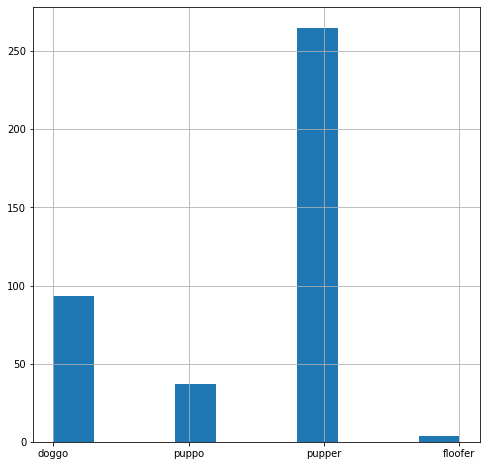

In [659]:
wrangle_act['dog_stage'].hist(figsize=(8, 8));

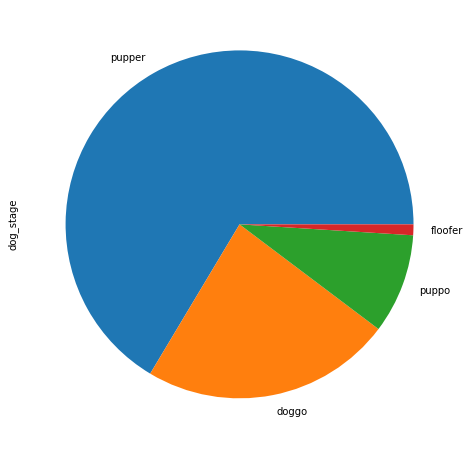

In [660]:
wrangle_act['dog_stage'].value_counts().plot(kind='pie', figsize=(8,8))

## Outcome for the most used dog stage was pupper!

## Insight How does the retweets vs favorites compare?

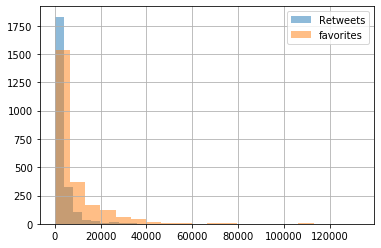

In [661]:
wrangle_act['retweets'].hist(alpha=0.5, bins=20, label='Retweets')
wrangle_act['favorites'].hist(alpha=0.5, bins=20, label='favorites')
plt.legend();

## Insight Was there going to be an output to support where data was coming from?

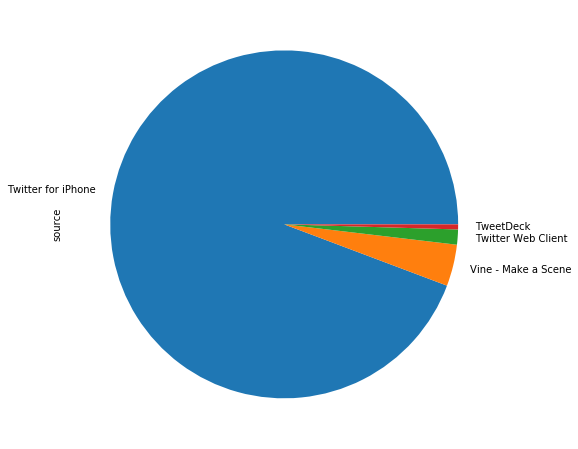

In [662]:
wrangle_act['source'].value_counts().plot(kind='pie', figsize=(8,8))

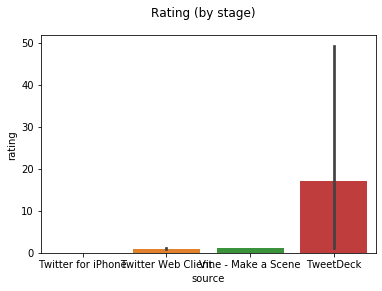

In [664]:
p=sns.barplot(data=wrangle_act, x='source', y='rating')
p.figure.suptitle('Rating (by stage)');

## Insight

 Which would be the most popular dog breed?

In [665]:
wrangle_act['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

## P1 winner golden retriever!

In [698]:
from IPython.display import display 
Image(url = 'https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg')

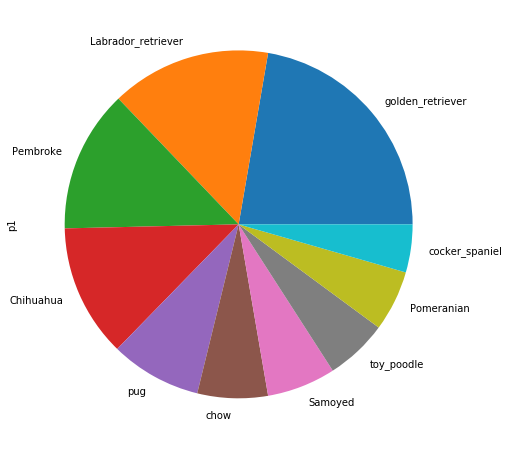

In [666]:
wrangle_act['p1'].value_counts().head(10).plot(kind='pie', figsize=(15, 8));

In [667]:
wrangle_act['p2'].value_counts().head(10)

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
Chesapeake_Bay_retriever     41
French_bulldog               41
toy_poodle                   37
cocker_spaniel               34
Siberian_husky               33
Name: p2, dtype: int64

## P2 winner labrador retriever!

In [697]:
from IPython.display import display 
Image(url = 'https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg')

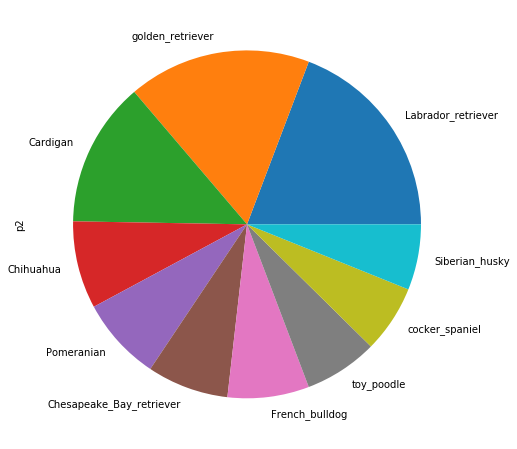

In [668]:
wrangle_act['p2'].value_counts().head(10).plot(kind='pie', figsize=(15, 8));

In [669]:
wrangle_act['p3'].value_counts().head(10)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
chow                         32
Staffordshire_bullterrier    32
cocker_spaniel               31
beagle                       31
Name: p3, dtype: int64

## P3 winner labrador retriever!

In [699]:
from IPython.display import display 
Image(url = 'https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg')

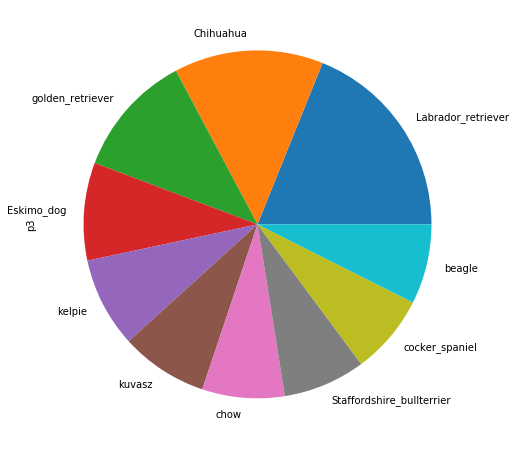

In [670]:
wrangle_act['p3'].value_counts().head(10).plot(kind='pie', figsize=(15, 8));

## Taking into consideration each value the Golden wins at 290 vs the Lab at 283!!

In [700]:
from IPython.display import display 
Image(url = 'https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg')

## Insight What would some of the most popular dog names currently being used?

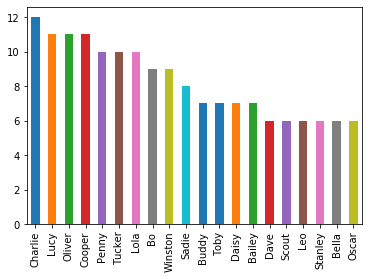

In [671]:
wrangle_act['name'].value_counts().head(20).plot(kind='bar')

## Here are the top 20 names popular amongst the data collected. 

## Top five 
1. Charlie
2. Oliver
3. Copper
4. Lucy
5. Penny

In [678]:
wrangle_act['tweet_id']

0       892421000000000000
1       892177000000000000
2       891815000000000000
3       891690000000000000
4       891328000000000000
5       891088000000000000
6       890972000000000000
7       890729000000000000
8       890609000000000000
9       890240000000000000
10      890007000000000000
11      889881000000000000
12      889665000000000000
13      889639000000000000
14      889531000000000000
15      889279000000000000
16      888917000000000000
17      888805000000000000
18      888555000000000000
19      888203000000000000
20      888078000000000000
21      887705000000000000
22      887517000000000000
23      887474000000000000
24      887343000000000000
25      887101000000000000
26      886983000000000000
27      886737000000000000
28      886680000000000000
29      886366000000000000
               ...        
4682    684830982659280897
4683    684588130326986752
4684    684147889187209216
4685    683515932363329536
4686    682808988178739200
4687    682088079302213632
4

## Resources

https://stackoverflow.com/questions/37725195/pandas-replace-values-based-on-index?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

https://stackoverflow.com/questions/28237210/image-does-not-display-in-ipython

https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/23667369/drop-all-duplicate-rows-in-python-pandas

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

https://www.answiz.com/questions/28779/attributeerror-apos-float-apos-object-has-no-attribute-apos-split-apos?ref=anwser

https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html